# Results Analysis

This notebook is intended to read a simulation results file and report the analysis.

In [1]:
%load_ext memory_profiler
%matplotlib inline

import os
import sys 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import graph_tool.all as gt
import matplotlib.pyplot as plt

# Modify the Notebook path
sys.path.append(os.path.join(os.getcwd(), ".."))

from cloudscope.colors import ColorMap
from cloudscope.results import Results
from cloudscope.viz import draw_topology
from cloudscope.viz import plot_workload
from cloudscope.viz import plot_message_traffic

from cloudscope.results.graph import extract_graph
from cloudscope.results.analysis import create_per_replica_dataframe as create_dataframe
from cloudscope.results.analysis import create_messages_dataframe

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('Set1')

In [5]:
# Specify a path to a results file 
FIXTURES = os.path.join("..", "fixtures", "results")
FIGURES  = os.path.join("..", "fixtures", "figures")

NAME     = "eventually-consistent-large-group-20160923.json"
RESULTS  = os.path.join(FIXTURES, NAME)

def get_results_data(path=RESULTS):
    with open(path, 'r') as f:
        return Results.load(f)

In [6]:
%%memit 
# Load the data
results = get_results_data()

peak memory: 175.01 MiB, increment: 46.18 MiB


In [ ]:
# Extract the Graph Tool graph     
G = extract_graph(results, by_message_type=True)

# Draw the graph 
vlabel  = G.vp['id']
vsize   = G.vp['writes']
vsize   = gt.prop_to_size(vsize, ma=60, mi=20)

# Set the vertex color 
vcolor  = G.new_vertex_property('string') 
vcmap   = ColorMap('flatui', shuffle=False)
for vertex in G.vertices():
    vcolor[vertex] = vcmap(G.vp['consistency'][vertex])

# Set the edge color 
ecolor  = G.new_edge_property('string')
ecmap   = ColorMap('set1', shuffle=False)
for edge in G.edges():
    ecolor[edge] = ecmap(G.ep['label'][edge])

elabel  = G.ep['label']
esize   = G.ep['norm']
esize   = gt.prop_to_size(esize, mi=.1, ma=3)
eweight = G.ep['weight']

# Figure out the path name to save the figure 
name = os.path.splitext(NAME)[0] + ".png"
output = os.path.join(FIGURES, name)

gt.graph_draw(
    G, output_size=(1200,1200), output=output,
    vertex_text=vlabel, vertex_size=vsize, vertex_font_weight=1, 
    vertex_pen_width=1.3, vertex_fill_color=vcolor,
    edge_pen_width=esize, edge_color=ecolor, edge_text=elabel
)

In [7]:
%%memit
# Create the data frame for further analysis
df = create_dataframe(results)

peak memory: 163.50 MiB, increment: 0.97 MiB


In [8]:
df

,completed reads,completed writes,consistency,cumulative read time staleness (ms),cumulative write time staleness (ms),empty reads,forked writes,id,label,location,...,partially visible writes,reads,replica,stale reads,stale writes,type,visible writes,writes,partially replicated writes,visibility ratio
0,152,144,eventual,178532.346201,119297.896907,1.0,22,a0,Alpha 0,alpha-site,...,42,153,a0,37,26,desktop,101,144,43,0.701389
1,149,149,eventual,68429.227952,130887.744750,NaN,20,a1,Alpha 1,alpha-site,...,52,149,a1,19,28,laptop,97,149,52,0.651007
2,135,161,eventual,52380.487698,75023.707542,2.0,16,a2,Alpha 2,alpha-site,...,39,137,a2,17,19,laptop,122,161,39,0.757764
3,148,149,eventual,165470.756921,160195.171695,2.0,28,a3,Alpha 3,alpha-site,...,48,150,a3,37,41,laptop,100,149,49,0.671141
4,160,132,eventual,192528.115962,111909.665862,4.0,18,b0,Bravo 0,bravo-site,...,44,164,b0,50,27,desktop,88,132,44,0.666667
5,153,141,eventual,122275.800777,120996.498153,5.0,18,b1,Bravo 1,bravo-site,...,39,158,b1,26,23,laptop,102,141,39,0.723404
6,156,142,eventual,206427.185390,153981.817999,1.0,23,b2,Bravo 2,bravo-site,...,45,157,b2,27,32,laptop,95,142,47,0.669014
7,150,150,eventual,142625.812188,138665.221262,NaN,21,b3,Bravo 3,bravo-site,...,49,150,b3,29,33,laptop,100,150,50,0.666667
8,164,134,eventual,87766.130106,76459.368983,NaN,15,c0,Charlie 0,charlie-site,...,30,164,c0,23,17,desktop,104,134,30,0.776119
9,152,150,eventual,89729.690941,170778.229271,NaN,24,c1,Charlie 1,charlie-site,...,37,152,c1,22,35,laptop,112,150,38,0.746667


# Results 

In [9]:
print results.print_details()

Simulation: Eventually Consistent Large Group (Cloudscope v0.4)
A large group of eventually consistent nodes in 5 locations.

Ran on: Sep 23, 2016 at 16:02 UTC (4 minutes 42 seconds)

Settings
Read Policy                latest
Constant                      N/A
Outage Stddev                 512
Online Stddev                 512
Access Mean                  3000
Outage Prob                   0.0
Seed                         None
Access Stddev                 380
Do Rumoring                     0
Partition Across             wide
Switch Prob                  0.05
Conflict Prob                 0.5
Move Prob                     0.1
Latency Stddev                 15
Integration             federated
Latency Mean                   60
Validate Consistency            1
Invalid Locations    [u'unknown']
Default Latency               800
Do Gossip                       1
Tick Metric                   600
Max Sim Time               900000
Random Seed                    42
Description          A la

## Topology

## Workload

In [ ]:
# Create the workload timeline plot 
plot_workload(results, series='objects')

In [ ]:
# Create the sent messages timeline
# plot_message_traffic(results.results['sent'])

In [ ]:
%%memit

def get_message_rows(df):
    for row in df[['message types', 'label', 'consistency']].itertuples(): 
        item = row[1]
        item['replica'] = "{} ({})".format(row[2], row[3])
        yield item

# Create the data frame 
msgs = pd.DataFrame(sorted(get_message_rows(df), key=lambda item: item['replica']))

# Create the figure 
fig = plt.figure(figsize=(14,20))
ax  = fig.add_subplot(111)
mpl.rcParams.update({'font.size': 14})

# Plot the bar chart 
g = msgs.plot(
    x='replica', kind='barh', stacked=True, ax=ax, 
    title="Message Counts by Type", color=sns.color_palette()
)

# Modify the figure 
ax.set_xlabel("message count")
ax.yaxis.grid(False)

# Save the figure to disk 
plt.savefig(os.path.join(FIGURES, 'message_counts.png'))

In [ ]:
# ax = sns.barplot(y='sent', x='replica', hue='type', data=msgs, estimator=count)

## Metrics 

The following metrics are reported from the results.

### Reads and Writes

Accesses
3072 Total Reads, 2910 Total Writes 
153.6 average reads per replica
145.5 average writes per replica



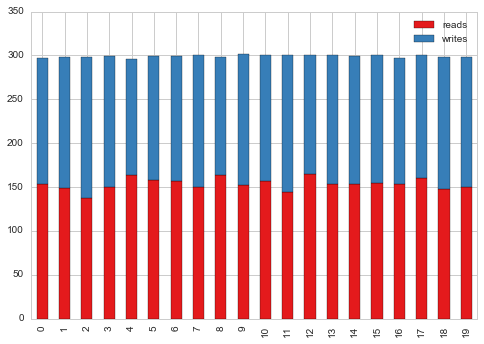

In [10]:
# Extract accesses 
accesses = pd.DataFrame(df, columns=['reads', 'writes'])

print (
    "Accesses\n"
    "========\n"
    "{} Total Reads, {} Total Writes \n"
    "{:0.1f} average reads per replica\n"
    "{:0.1f} average writes per replica\n"
).format(
    df.reads.sum(), df.writes.sum(), df.reads.mean(), df.writes.mean()
)

accesses.plot(kind='bar', stacked=True)

### Stale Reads

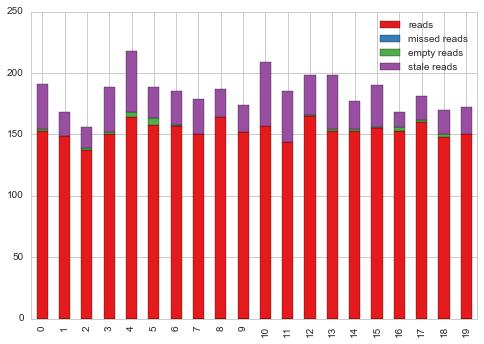

In [11]:
errors = pd.DataFrame(df, columns=['reads', 'missed reads', 'empty reads', 'stale reads'])
errors.plot(kind='bar', stacked=True)

### Forked Writes

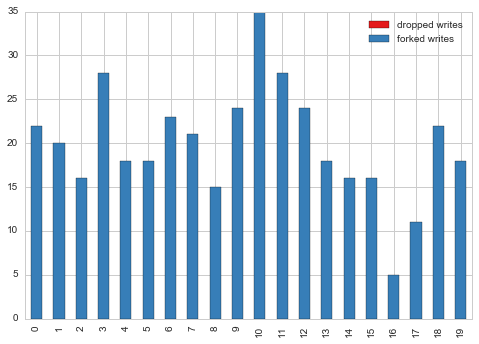

In [12]:
errors = pd.DataFrame(df, columns=['dropped writes', 'forked writes'])
errors.plot(kind='bar', stacked=True)

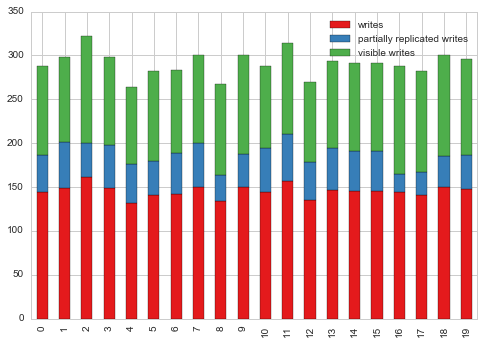

In [13]:
errors = pd.DataFrame(df, columns=['writes', 'partially replicated writes', 'visible writes'])
errors.plot(kind='bar', stacked=True)

### Read and Write Costs

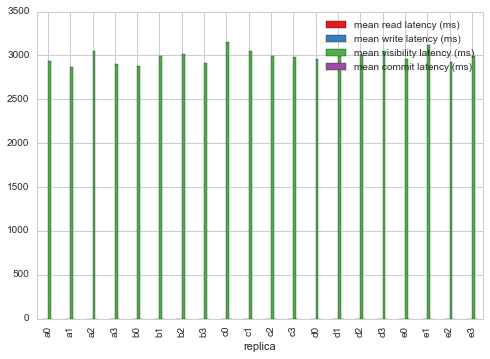

In [14]:
data=pd.DataFrame(df, columns=['replica', 'mean read latency (ms)', 'mean write latency (ms)', 'mean visibility latency (ms)', 'mean commit latency (ms)'])
data.plot(kind='bar', x='replica')

In [ ]:
sns.s